In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import sklearn
print(sklearn.__version__)
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

1.4.2


In [2]:
!pip install -U scikit-learn

# **Load Data**

In [2]:
# Load your dataset
df = pd.read_csv('/content/mhealth_raw_data.csv')
df


,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity,subject
0,2.1849,-9.6967,0.63077,0.103900,-0.84053,-0.68762,-8.6499,-4.5781,0.187760,-0.449020,-1.01030,0.034483,0,subject1
1,2.3876,-9.5080,0.68389,0.085343,-0.83865,-0.68369,-8.6275,-4.3198,0.023595,-0.449020,-1.01030,0.034483,0,subject1
2,2.4086,-9.5674,0.68113,0.085343,-0.83865,-0.68369,-8.5055,-4.2772,0.275720,-0.449020,-1.01030,0.034483,0,subject1
3,2.1814,-9.4301,0.55031,0.085343,-0.83865,-0.68369,-8.6279,-4.3163,0.367520,-0.456860,-1.00820,0.025862,0,subject1
4,2.4173,-9.3889,0.71098,0.085343,-0.83865,-0.68369,-8.7008,-4.1459,0.407290,-0.456860,-1.00820,0.025862,0,subject1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1215740,1.7849,-9.8287,0.29725,-0.341370,-0.90056,-0.61493,-3.7198,-8.9071,0.294230,0.041176,-0.99384,-0.480600,0,subject10
1215741,1.8687,-9.8766,0.46236,-0.341370,-0.90056,-0.61493,-3.7160,-8.7455,0.448140,0.041176,-0.99384,-0.480600,0,subject10
1215742,1.6928,-9.9290,0.16631,-0.341370,-0.90056,-0.61493,-3.8824,-9.1155,0.450480,0.041176,-0.99384,-0.480600,0,subject10
1215743,1.5279,-9.6306,0.30458,-0.341370,-0.90056,-0.61493,-3.5564,-9.1441,0.594880,0.041176,-0.99384,-0.480600,0,subject10


# **preprocessing**

In [5]:
df.describe()

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity
count,1.215745e+06,1.215745e+06,1.215745e+06,1.215745e+06,1.215745e+06,1.215745e+06,1.215745e+06,1.215745e+06,1.215745e+06,1.215745e+06,1.215745e+06,1.215745e+06,1.215745e+06
mean,1.494200e+00,-9.692878e+00,-9.548056e-01,-1.598951e-03,-6.166318e-01,-1.587811e-01,-3.713413e+00,-5.805526e+00,2.393880e+00,-2.761061e-01,-4.664340e-01,2.666335e-01,1.741465e+00
std,3.826485e+00,4.171303e+00,5.461803e+00,4.912172e-01,3.546406e-01,5.467979e-01,4.763586e+00,5.757639e+00,3.876503e+00,5.276888e-01,5.555510e-01,5.643804e-01,3.283679e+00
min,-2.214600e+01,-1.961900e+01,-1.937300e+01,-2.146600e+00,-7.789900e+00,-2.626700e+00,-2.236100e+01,-1.897200e+01,-1.823900e+01,-8.339200e+00,-3.570800e+00,-2.689700e+00,0.000000e+00
25%,1.413100e-01,-1.020100e+01,-2.649400e+00,-4.359900e-01,-8.180100e-01,-5.933200e-01,-6.076000e+00,-9.404200e+00,1.296500e-01,-7.058800e-01,-8.973300e-01,-2.370700e-01,0.000000e+00
50%,1.308900e+00,-9.670300e+00,-1.645600e-02,-1.484200e-02,-7.073200e-01,-1.905700e-01,-2.977600e+00,-7.461500e+00,1.928100e+00,-3.549000e-01,-6.345000e-01,3.017200e-01,0.000000e+00
75%,2.575800e+00,-9.042200e+00,1.301300e+00,4.489800e-01,-5.403400e-01,3.222000e-01,-1.193700e+00,-2.533900e+00,4.914700e+00,9.607800e-02,-1.067800e-01,7.780200e-01,2.000000e+00
max,2.005400e+01,2.116100e+01,2.501500e+01,6.048400e+01,2.011300e+00,2.770100e+00,1.986400e+01,2.219100e+01,2.574100e+01,3.319600e+00,1.556500e+00,2.750000e+00,1.200000e+01


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1215745 entries, 0 to 1215744
Data columns (total 14 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   alx       1215745 non-null  float64
 1   aly       1215745 non-null  float64
 2   alz       1215745 non-null  float64
 3   glx       1215745 non-null  float64
 4   gly       1215745 non-null  float64
 5   glz       1215745 non-null  float64
 6   arx       1215745 non-null  float64
 7   ary       1215745 non-null  float64
 8   arz       1215745 non-null  float64
 9   grx       1215745 non-null  float64
 10  gry       1215745 non-null  float64
 11  grz       1215745 non-null  float64
 12  Activity  1215745 non-null  int64  
 13  subject   1215745 non-null  object 
dtypes: float64(12), int64(1), object(1)
memory usage: 129.9+ MB


In [7]:
#check for missing data
missing_values = df.isnull().sum()
missing_values

alx         0
aly         0
alz         0
glx         0
gly         0
glz         0
arx         0
ary         0
arz         0
grx         0
gry         0
grz         0
Activity    0
subject     0
dtype: int64

In [8]:
#check duplicates
duplicate_count = df.duplicated().sum()
duplicate_count

0

In [9]:
##select all rows and all columns except the last one.
X = df.iloc[:, :-1]
X
##select all rows, but only the last column.
y = df.iloc[:, -1]
y

0           subject1
1           subject1
2           subject1
3           subject1
4           subject1
             ...    
1215740    subject10
1215741    subject10
1215742    subject10
1215743    subject10
1215744    subject10
Name: subject, Length: 1215745, dtype: object


# visualization

In [10]:
numerical_columns = df.select_dtypes(include='number').columns
categorical_columns = df.select_dtypes(include='object').columns

<Axes: >

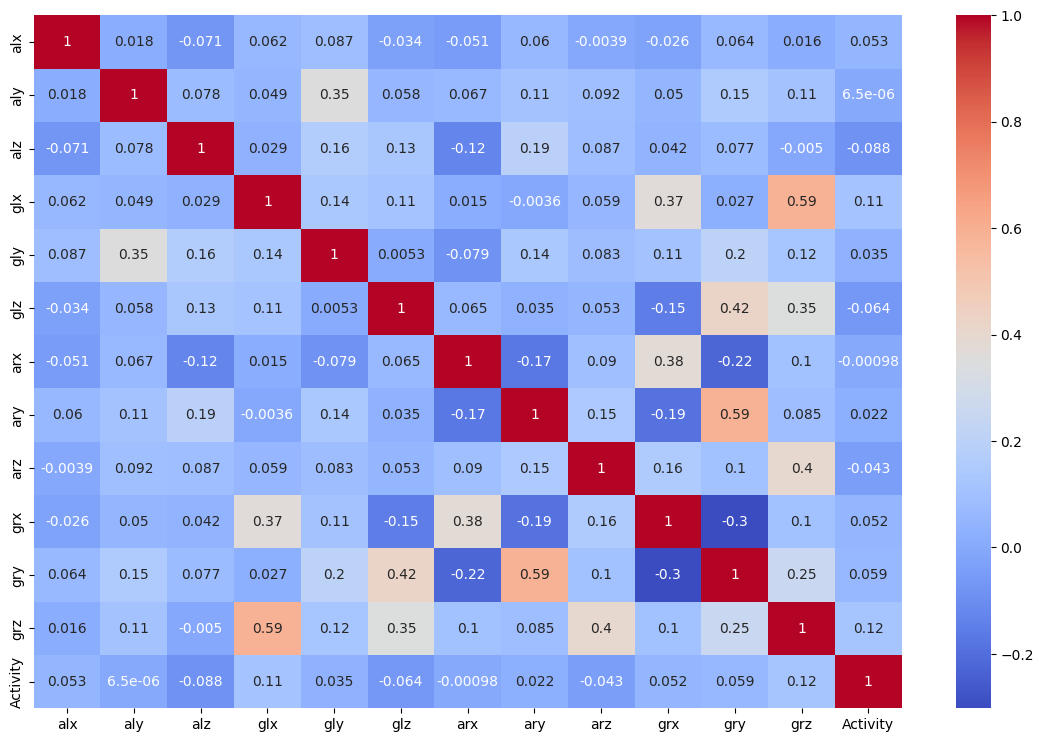

In [11]:
corr = df[numerical_columns].corr()
plt.figure(figsize=(14, 9))
sns.heatmap(corr, cmap='coolwarm', annot=True)

array([[<Axes: title={'center': 'alx'}>, <Axes: title={'center': 'aly'}>,
        <Axes: title={'center': 'alz'}>, <Axes: title={'center': 'glx'}>],
       [<Axes: title={'center': 'gly'}>, <Axes: title={'center': 'glz'}>,
        <Axes: title={'center': 'arx'}>, <Axes: title={'center': 'ary'}>],
       [<Axes: title={'center': 'arz'}>, <Axes: title={'center': 'grx'}>,
        <Axes: title={'center': 'gry'}>, <Axes: title={'center': 'grz'}>],
       [<Axes: title={'center': 'Activity'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

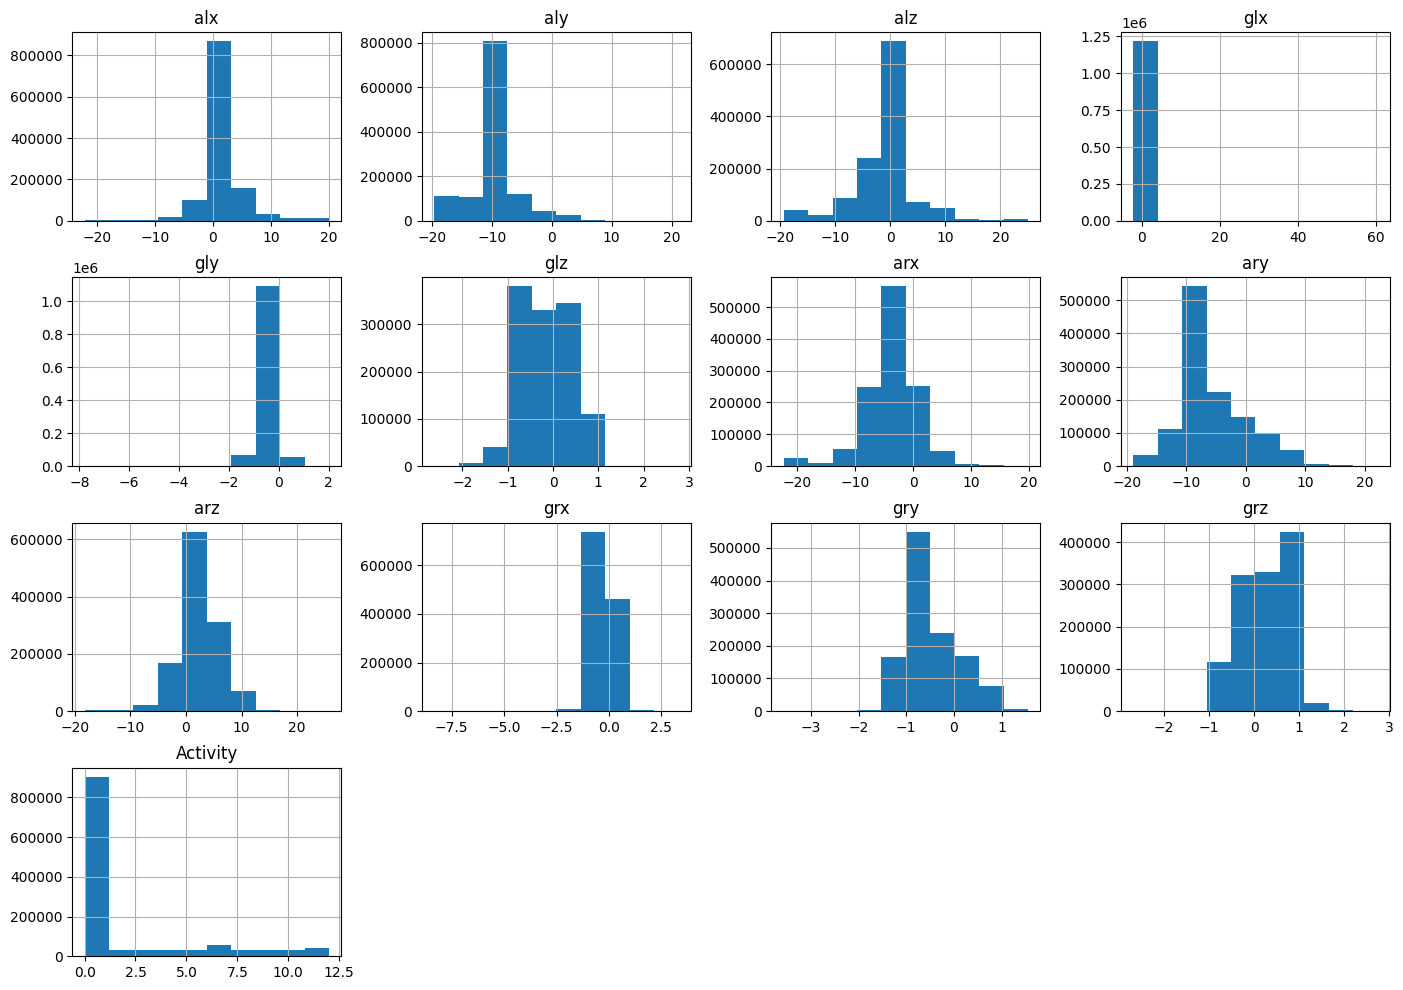

In [12]:
df.hist(figsize=(17, 12))

In [13]:
df[categorical_columns].nunique()

subject    10
dtype: int64

<Axes: xlabel='Activity', ylabel='count'>

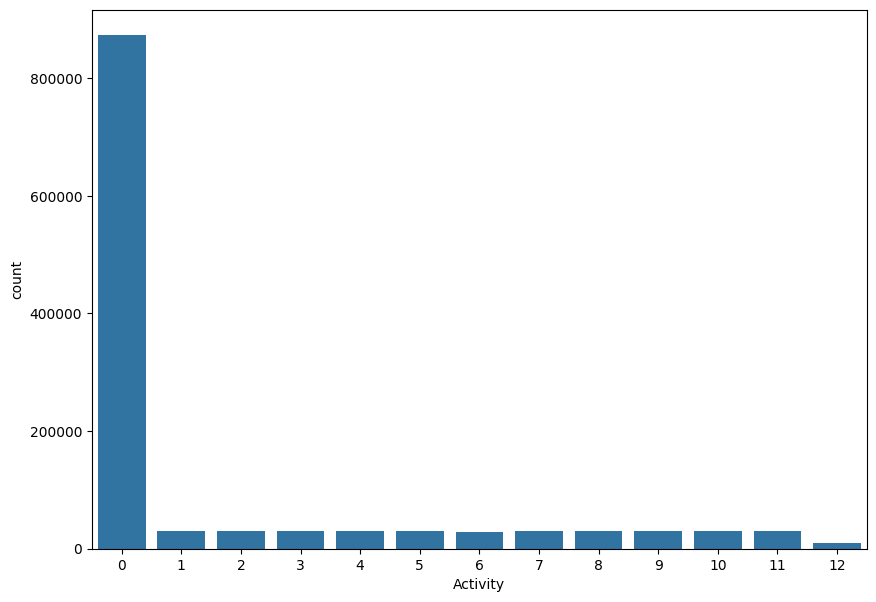

In [14]:
plt.figure(figsize=(10, 7))
sns.countplot(df, x='Activity')

In [ ]:
df.subject



0           subject1
1           subject1
2           subject1
3           subject1
4           subject1
             ...    
1215740    subject10
1215741    subject10
1215742    subject10
1215743    subject10
1215744    subject10
Name: subject, Length: 1215745, dtype: object

In [15]:
df.shape

(1215745, 14)

# KNN

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np




# Create a representative subset of the data, e.g., 10% of the data
subset_data = df.sample(frac=0.1, random_state=42)

# Split the subset into training AND validation and test
# split into training (70% of subset) and temp (REMAIN 30% of subset)
X_train, X_temp, y_train, y_temp = train_test_split(subset_data.drop(columns=['Activity', 'subject']), subset_data['Activity'], test_size=0.3, random_state=42)

# Now split the temp into validation and test sets (each will be 15% of the original subset)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Convert all arrays to numpy arrays for compatibility with most ML libraries
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)
X_val = np.asarray(X_val)
y_val = np.asarray(y_val)
X_test = np.asarray(X_test)
y_test = np.asarray(y_test)


In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit on the training data and transform the train, test, and validation sets
X_train_scaled = scaler.fit_transform(X_train)

X_val_scaled = scaler.transform(X_val)

X_test_scaled = scaler.transform(X_test)


In [18]:
train_accuracies = []
val_accuracies = []
test_accuracies = []

neighbors = range(1,10)
for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train_scaled, y_train)

    # Predict on the training set and calculate accuracy
    y_pred_train = knn.predict(X_train_scaled)
    train_acc = accuracy_score(y_train, y_pred_train)
    train_accuracies.append(train_acc)

    # Predict on the validation set and calculate accuracy
    y_pred_val = knn.predict(X_val_scaled)
    val_acc = accuracy_score(y_val, y_pred_val)
    val_accuracies.append(val_acc)

    # Predict on the test set and calculate accuracy
    y_pred_test = knn.predict(X_test_scaled)
    test_acc = accuracy_score(y_test, y_pred_test)
    test_accuracies.append(test_acc)

In [19]:
print("Training Accuracies:", train_accuracies)

print("Validation Accuracies:", val_accuracies)

print("Test Accuracies:", test_accuracies)

Training Accuracies: [1.0, 0.9439842070010929, 0.9345013572108436, 0.925171267082643, 0.9149598712118542, 0.9129739956052221, 0.9049129857463485, 0.9032678816935171, 0.8978155368327047]
Validation Accuracies: [0.873601667032244, 0.8577538933976749, 0.8748080719456021, 0.8720662425970608, 0.8767821890765519, 0.8733274840973898, 0.8753016012283396, 0.8740951963149813, 0.8748080719456021]
Test Accuracies: [0.8701540823600373, 0.8561715194385041, 0.8784339529527883, 0.8703185831002906, 0.8787081208532105, 0.874321434446455, 0.8762406097494105, 0.8736634314854417, 0.8738827658057795]


In [20]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=9)

In [21]:
knn.score(X_train_scaled, y_train)

0.8978155368327047

In [ ]:
knn.score(X_test_scaled, y_test)

0.8738827658057795

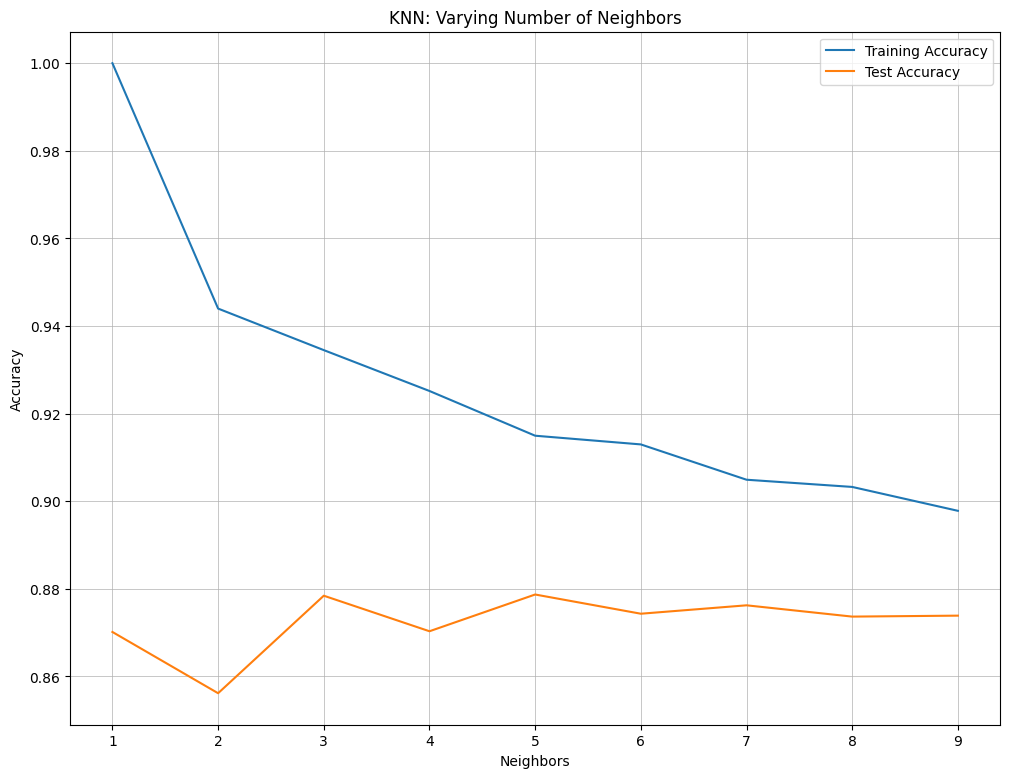

In [22]:
plt.figure(figsize=(12, 9))
plt.plot(neighbors, train_accuracies, label="Training Accuracy")

plt.plot(neighbors, test_accuracies, label = "Test Accuracy")
plt.title("KNN: Varying Number of Neighbors")
plt.legend()
plt.xlabel("Neighbors")
plt.ylabel("Accuracy")
plt.grid(True, which='both', axis='both', linestyle='-', linewidth=0.5)
plt.xticks(ticks=neighbors)
plt.show()

In [23]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [26]:
# "precision","recall","f1-score","support"
KNN_report = classification_report(y_test, y_pred_test)
print(KNN_report)

              precision    recall  f1-score   support

           0       0.94      0.89      0.91     13119
           1       0.79      0.93      0.86       461
           2       0.77      0.96      0.85       486
           3       0.82      0.98      0.89       479
           4       0.66      0.77      0.71       448
           5       0.79      0.63      0.70       475
           6       0.73      0.87      0.79       394
           7       0.72      0.88      0.79       438
           8       0.70      0.87      0.78       398
           9       0.67      0.86      0.76       457
          10       0.70      0.84      0.76       482
          11       0.71      0.81      0.76       436
          12       0.66      0.27      0.39       164

    accuracy                           0.87     18237
   macro avg       0.74      0.81      0.77     18237
weighted avg       0.88      0.87      0.87     18237



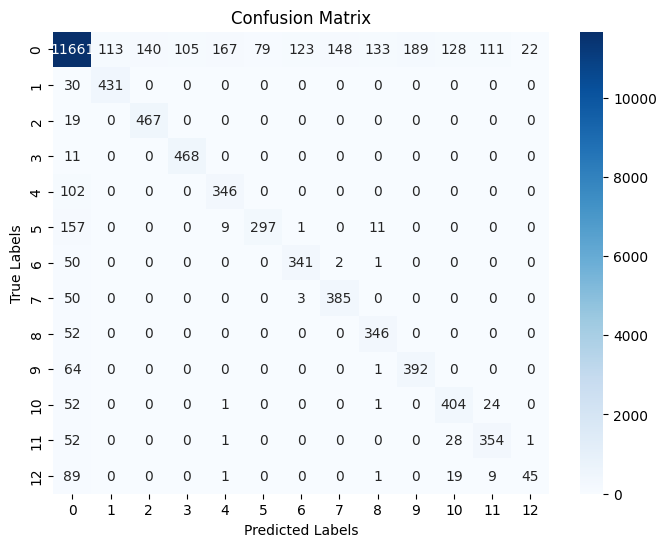

In [27]:
# Confusion matrix
KNN_Confusion= confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(KNN_Confusion, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Linear Regression

In [3]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression

In [4]:
df.drop('subject', axis=1, inplace=True)

x = df.iloc[: , : -1]
# Scaling the data
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)
x

array([[ 1.80505145e-01, -9.16146446e-04,  2.90302716e-01, ...,
        -3.27681742e-01, -9.78967183e-01, -4.11337063e-01],
       [ 2.33478058e-01,  4.43215351e-02,  3.00028446e-01, ...,
        -3.27681742e-01, -9.78967183e-01, -4.11337063e-01],
       [ 2.38966125e-01,  3.00813746e-02,  2.99523118e-01, ...,
        -3.27681742e-01, -9.78967183e-01, -4.11337063e-01],
       ...,
       [ 5.19014430e-02, -5.66062017e-02,  2.05264831e-01, ...,
         6.01267672e-01, -9.49338928e-01, -1.32398965e+00],
       [ 8.80705048e-03,  1.49302274e-02,  2.30580656e-01, ...,
         6.01267672e-01, -9.49338928e-01, -1.32398965e+00],
       [ 4.36954762e-02, -3.52219876e-02,  2.07932449e-01, ...,
         5.90120946e-01, -9.97327340e-01, -1.30871626e+00]])

In [5]:
y = df.iloc[: , -1]
y

0          0
1          0
2          0
3          0
4          0
          ..
1215740    0
1215741    0
1215742    0
1215743    0
1215744    0
Name: Activity, Length: 1215745, dtype: int64

In [6]:
from sklearn.model_selection import train_test_split
# Initialize the Linear Regression model
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.3 , shuffle = True , random_state = 0)

x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

x_test = np.asarray(x_test)
y_test = np.asarray(y_test)

print(x_train.shape)
print(x_test.shape)




(851021, 12)
(364724, 12)


In [7]:
# Normalize the data
scaler = StandardScaler().fit(x_train)
#Apply the normalizer on the train data
x_train_normalized = scaler.transform(x_train)
#Apply the normalizer on the test data
x_test_normalized = scaler.transform(x_test)
print(x_train_normalized)

[[-0.0155957   0.00647155  0.34328591 ... -0.83170684 -0.11386004
   0.642527  ]
 [ 0.52443428  2.72934114  1.80948049 ...  0.17136317  2.14158619
   0.90212601]
 [ 0.32902097  0.11514967  0.49294612 ... -0.68682231 -0.77202265
  -0.56004086]
 ...
 [ 0.10838798  0.02680828  0.08547887 ... -0.19271437 -0.89772736
   0.43256267]
 [-1.28519482  0.086501    0.29737708 ... -2.4031554   3.01780983
   0.39819747]
 [ 0.39355827  0.08666867 -0.23455885 ...  1.81710129 -0.38747173
  -0.49132285]]


In [8]:
lin_reg_scaled = LinearRegression()


lin_reg_scaled.fit(x_train_normalized, y_train)


training_score = lin_reg_scaled.score(x_train_normalized, y_train)

test_score = lin_reg_scaled.score(x_test_normalized, y_test)

print("Training Score (Scaled):", training_score)
print("test Score (Scaled):", test_score)

Training Score (Scaled): 0.055198319767516435
test Score (Scaled): 0.05353108208067314


In [9]:
from sklearn.metrics import mean_squared_error, r2_score
# Predict using the scaled test set
y_pred = lin_reg_scaled.predict(x_test_normalized)

# Calculate the R² score and MSE
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Output the performance metrics
print(f"R² Score on Test Data: {r2}")
print(f"Mean Squared Error on Test Data: {mse}")
print(f"Root Mean Squared Error on Test Data: {rmse}")


R² Score on Test Data: 0.05353108208067314
Mean Squared Error on Test Data: 10.194611590254103
Root Mean Squared Error on Test Data: 3.1929001848247784


# Polynomial features

In [10]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.preprocessing import PolynomialFeatures



# polynomial features
poly = PolynomialFeatures(2)
X_train_poly = poly.fit_transform(x_train)
X_test_poly = poly.transform(x_test)



#  Linear Regression model
lr = LinearRegression()
lr.fit(X_train_poly, y_train)

y_test_pred = lr.predict(X_test_poly)


lr.score(X_train_poly, y_train), lr.score(X_test_poly, y_test)


(0.2506013723198216, 0.24598694363802998)

In [11]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
lin_cv_results = cross_val_score(lr, X_train_poly, y_train, cv=kf)
print("Cross-validation results:", lin_cv_results)
print("Mean CV accuracy:", lin_cv_results.mean())

Cross-validation results: [ 0.24992116 -8.46624568  0.2505729   0.25001565  0.25386786]
Mean CV accuracy: -1.4923736216668488


In [12]:
from sklearn.metrics import mean_squared_error
import numpy as np

In [14]:
# calculate
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
print("(MSE): ", mse)
print("(RMSE): ", rmse)


(MSE):  8.121629879287655
(RMSE):  2.8498473431550075


# SVM

In [5]:
from mlxtend.plotting import plot_decision_regions
from sklearn.svm import SVC

In [6]:
print("Initial class distribution:")
print(df['Activity'].value_counts())

Initial class distribution:
Activity
0     872550
1      30720
2      30720
3      30720
4      30720
9      30720
10     30720
11     30720
5      30720
7      29441
8      29337
6      28315
12     10342
Name: count, dtype: int64


In [7]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# SVM model
svm_model = SVC(C=5, kernel='rbf', gamma=0.5)

# Fit the model on the training data
svm_model.fit(X_train_scaled, y_train)

# Predict on the validation
y_val_pred = svm_model.predict(X_val_scaled)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f'Validation Accuracy with "rbf" kernel: {val_accuracy:.2f}')



Validation Accuracy with "rbf" kernel: 0.88


In [11]:
# After validating predict and evaluate on  test
y_test_pred = svm_model.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy with "rbf" kernel: {test_accuracy:.2f}')


Test Accuracy with "rbf" kernel: 0.88


In [12]:
SVM_report = classification_report(y_test, y_test_pred)
print(SVM_report)

              precision    recall  f1-score   support

           0       0.93      0.91      0.92     13119
           1       0.76      0.97      0.85       461
           2       0.72      1.00      0.83       486
           3       0.78      1.00      0.87       479
           4       0.73      0.78      0.75       448
           5       0.87      0.73      0.80       475
           6       0.78      0.78      0.78       394
           7       0.77      0.88      0.82       438
           8       0.78      0.77      0.78       398
           9       0.80      0.91      0.85       457
          10       0.78      0.76      0.77       482
          11       0.78      0.66      0.71       436
          12       0.71      0.30      0.42       164

    accuracy                           0.88     18237
   macro avg       0.78      0.80      0.78     18237
weighted avg       0.89      0.88      0.88     18237



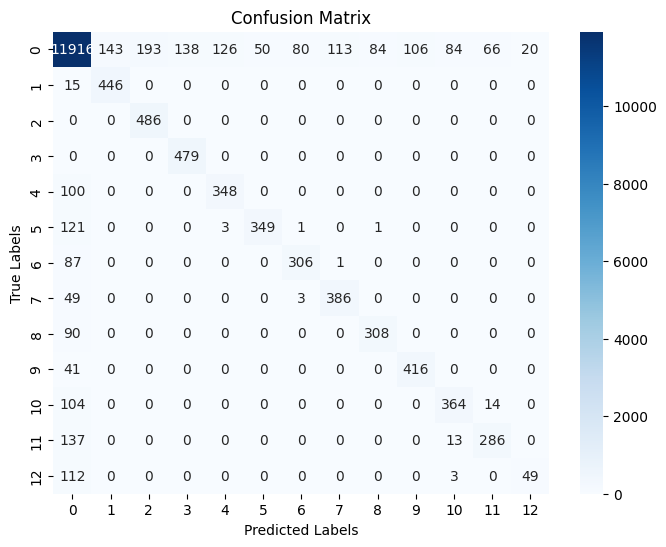

In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
# Confusion matrix
cm_svm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Nueral network

In [15]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split

In [16]:
 # Update the file path as needed
X = df.drop(['Activity', 'subject'], axis=1)
y = df['Activity']


min_max_scaler = MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X)

# Encode
encoder = OneHotEncoder(sparse_output=False)
y_encoded = encoder.fit_transform(y.values.reshape(-1, 1))

subset_data = df.sample(frac=0.1, random_state=42)
# Split the data into training and temporary (validation + test) sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y_encoded, test_size=0.3, random_state=42)

# Split the temporary data into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape)

(851021, 12) (182362, 12) (182362, 12) (851021, 13) (182362, 13) (182362, 13)


In [18]:
851021/512


1662.150390625

In [20]:
num_classes = y_encoded.shape[1]  # Number of unique classes
num_features = X_train.shape[1]


model = Sequential([
    Dense(64, activation='relu', input_shape=(num_features,)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='sigmoid')
])


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

hist = model.fit(X_train, y_train,
                 batch_size=1024,
                 epochs=100,
                 validation_data=(X_val, y_val))



Epoch 1/100
832/832 [==============================] - 7s 7ms/step - loss: 0.9843 - accuracy: 0.7329 - val_loss: 0.7437 - val_accuracy: 0.7527
Epoch 2/100
832/832 [==============================] - 5s 6ms/step - loss: 0.6793 - accuracy: 0.7595 - val_loss: 0.6277 - val_accuracy: 0.7693
Epoch 3/100
832/832 [==============================] - 7s 9ms/step - loss: 0.6070 - accuracy: 0.7745 - val_loss: 0.6102 - val_accuracy: 0.7735
Epoch 4/100
832/832 [==============================] - 5s 6ms/step - loss: 0.5671 - accuracy: 0.7844 - val_loss: 0.5468 - val_accuracy: 0.7923
Epoch 5/100
832/832 [==============================] - 7s 9ms/step - loss: 0.5372 - accuracy: 0.7923 - val_loss: 0.5349 - val_accuracy: 0.7936
Epoch 6/100
832/832 [==============================] - 6s 7ms/step - loss: 0.5160 - accuracy: 0.7985 - val_loss: 0.5060 - val_accuracy: 0.8027
Epoch 7/100
832/832 [==============================] - 6s 7ms/step - loss: 0.5007 - accuracy: 0.8030 - val_loss: 0.4982 - val_accuracy: 0.8014

In [21]:
y = model.predict(X_test)

test_accuracy = model.evaluate(X_test, y_test)

print(f"Test Accuracy: {test_accuracy}")

5699/5699 [==============================] - 9s 2ms/step - loss: 0.3153 - accuracy: 0.8643
Test Accuracy: [0.3152517080307007, 0.8643028736114502]


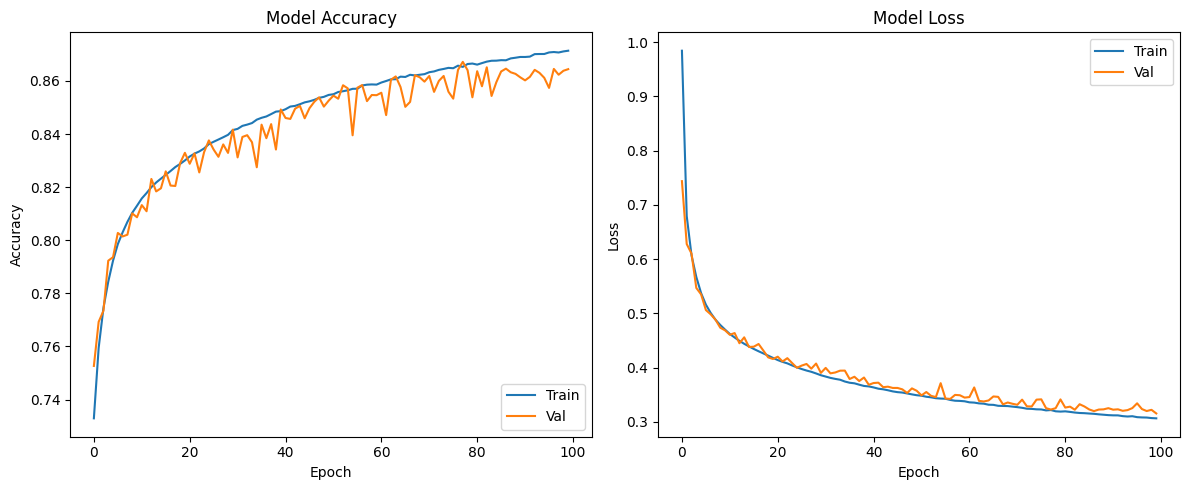

In [24]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')

plt.tight_layout()
plt.show()


In [22]:
import numpy as np
from sklearn.metrics import classification_report


NN_y_predic = np.argmax(y, axis=1)
y_test_c = np.argmax(y_test, axis=1)

NN_report = classification_report(y_test_c, NN_y_predic)
print(NN_report)


              precision    recall  f1-score   support

           0       0.89      0.92      0.91    131084
           1       0.78      0.73      0.75      4604
           2       0.74      0.93      0.83      4589
           3       0.79      0.99      0.88      4581
           4       0.75      0.64      0.69      4609
           5       0.75      0.50      0.60      4652
           6       0.83      0.51      0.63      4267
           7       0.76      0.74      0.75      4337
           8       0.81      0.57      0.67      4341
           9       0.79      0.77      0.78      4586
          10       0.76      0.83      0.80      4535
          11       0.75      0.60      0.67      4577
          12       0.61      0.41      0.49      1600

    accuracy                           0.86    182362
   macro avg       0.77      0.70      0.73    182362
weighted avg       0.86      0.86      0.85    182362



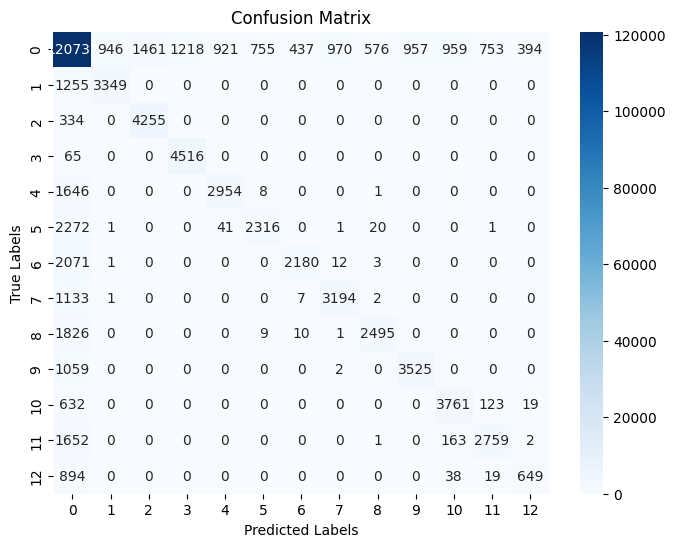

In [23]:
# Confusion matrix
Neural_Network_Confusion= confusion_matrix(y_test_c, NN_y_predic)
plt.figure(figsize=(8, 6))
sns.heatmap(Neural_Network_Confusion, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Logistic Regession

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay


In [26]:
from sklearn.preprocessing import LabelEncoder
X = df.drop(['Activity', 'subject'] , axis=1)
y = df['Activity']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)


subset_data = df.sample(frac=0.1, random_state=42)

# Split the data into training and temporary (validation + test) sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y_encoded, test_size=0.3, random_state=42)

# Split the temporary data into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape)

(851021, 12) (182362, 12) (182362, 12) (851021,) (182362,) (182362,)


In [32]:
clf = LogisticRegression()

# Fit the model on the training data
clf.fit(X_train, y_train)

# Predict on validation set
y_val_pred = clf.predict(X_val)

# Evaluate the model on the validation data
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f'Validation Accuracy: {val_accuracy}')




Validation Accuracy: 0.7279257740099363


In [33]:
y_test_pred = clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {test_accuracy}')

Test Accuracy: 0.7286496090194229


In [39]:
Logistic = cross_val_score(clf, X_train, y_train, cv=5)
print("Cross-validation results:", Logistic)
print("Mean CV accuracy:", Logistic.mean())

Cross-validation results: [0.72800447 0.72735658 0.7276386  0.72828488 0.72908392]
Mean CV accuracy: 0.7280736903898084


# report

In [34]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.75      0.96      0.84    131084
           1       0.00      0.00      0.00      4604
           2       0.00      0.00      0.00      4589
           3       0.68      0.91      0.78      4581
           4       0.03      0.00      0.00      4609
           5       0.00      0.00      0.00      4652
           6       0.05      0.01      0.01      4267
           7       0.11      0.01      0.01      4337
           8       0.01      0.00      0.00      4341
           9       0.54      0.37      0.44      4586
          10       0.38      0.08      0.13      4535
          11       0.48      0.25      0.32      4577
          12       0.00      0.00      0.00      1600

    accuracy                           0.73    182362
   macro avg       0.23      0.20      0.19    182362
weighted avg       0.59      0.73      0.64    182362



# Confusion matrix

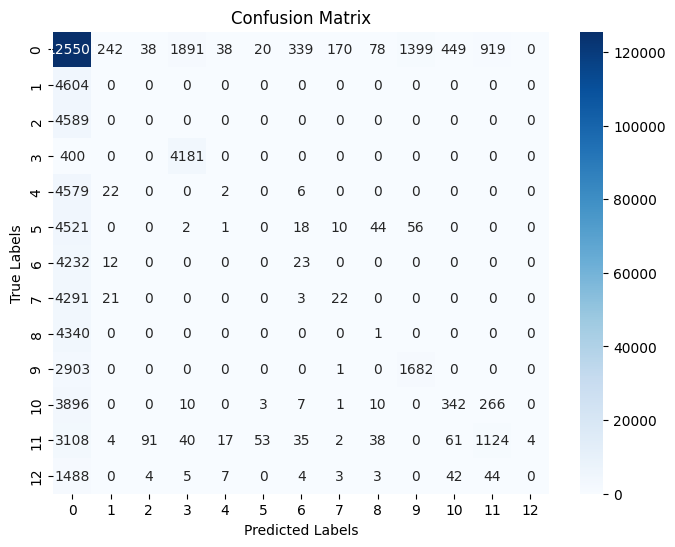

In [35]:
# Confusion matrix
Logistic_Regression_matrix= confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(Logistic_Regression_matrix, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()